In [31]:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import load_model
import matplotlib.pyplot as plt

In [90]:
IMAGE_SIZE = 256
BATCH_SIZE = 2

In [39]:
test_data_prepared = tf.keras.preprocessing.image_dataset_from_directory(
    "tomato-images",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 56 files belonging to 10 classes.


In [40]:
test_data_unprepared = tf.keras.preprocessing.image_dataset_from_directory(
    "images-unprepared",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 62 files belonging to 10 classes.


In [41]:
class_names = test_data_prepared.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [42]:
class_names2 = test_data_unprepared.class_names
class_names2

['bacterial_spot',
 'early_blight',
 'healthy',
 'late_blight',
 'leaf_mold',
 'mosaic_virus',
 'septoria_leaf',
 'spider_mites_two_spot',
 'spot_disease',
 'yellow_leaf_curl']

In [86]:
model = load_model("../models/2.keras")

In [87]:
scores = model.evaluate(test_data_unprepared)

4/4 [==============================] - 1s 18ms/step - loss: 22.2434 - accuracy: 0.1290


In [89]:
scores = model.evaluate(test_data_prepared)

4/4 [==============================] - 0s 57ms/step - loss: 28.7178 - accuracy: 0.2143


In [63]:
import numpy as np

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 13ms/step


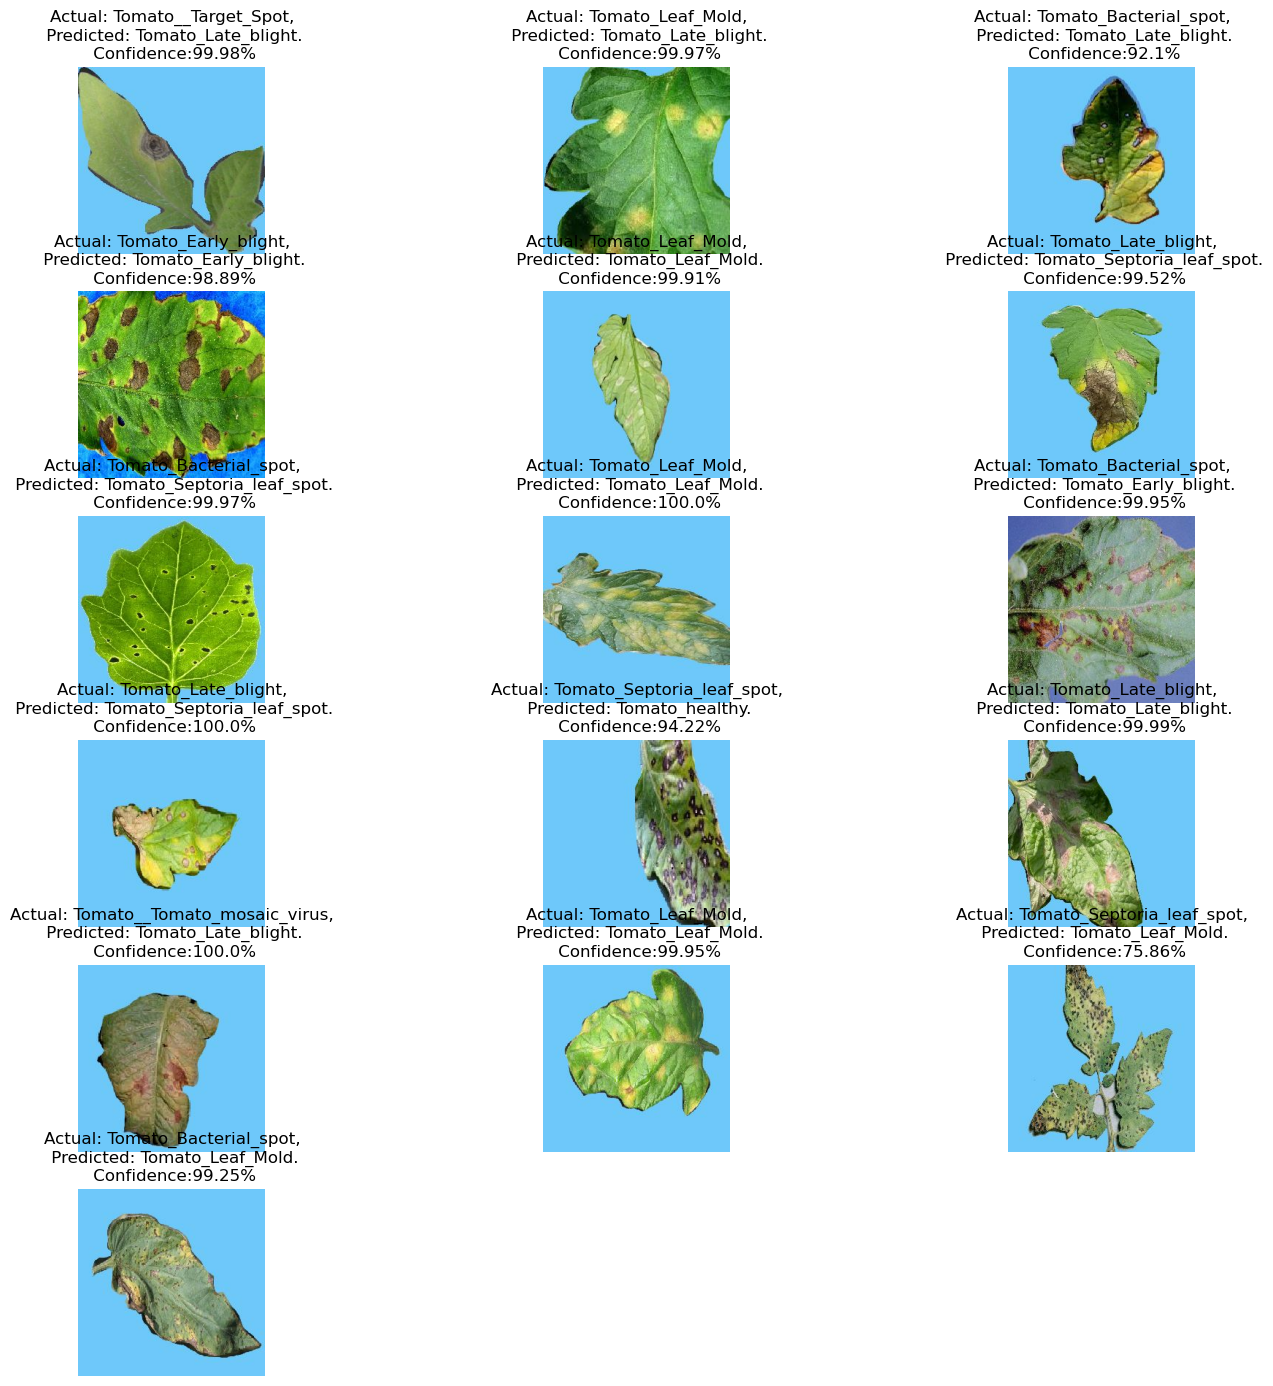

In [73]:
plt.figure(figsize = (17,17))
for images, labels in test_data_prepared.take(1):
    for i in range(16):
        ax = plt.subplot(6, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence:{confidence}%")
        
        plt.axis("off")

In [56]:
def predict2(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names2[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 14ms/step


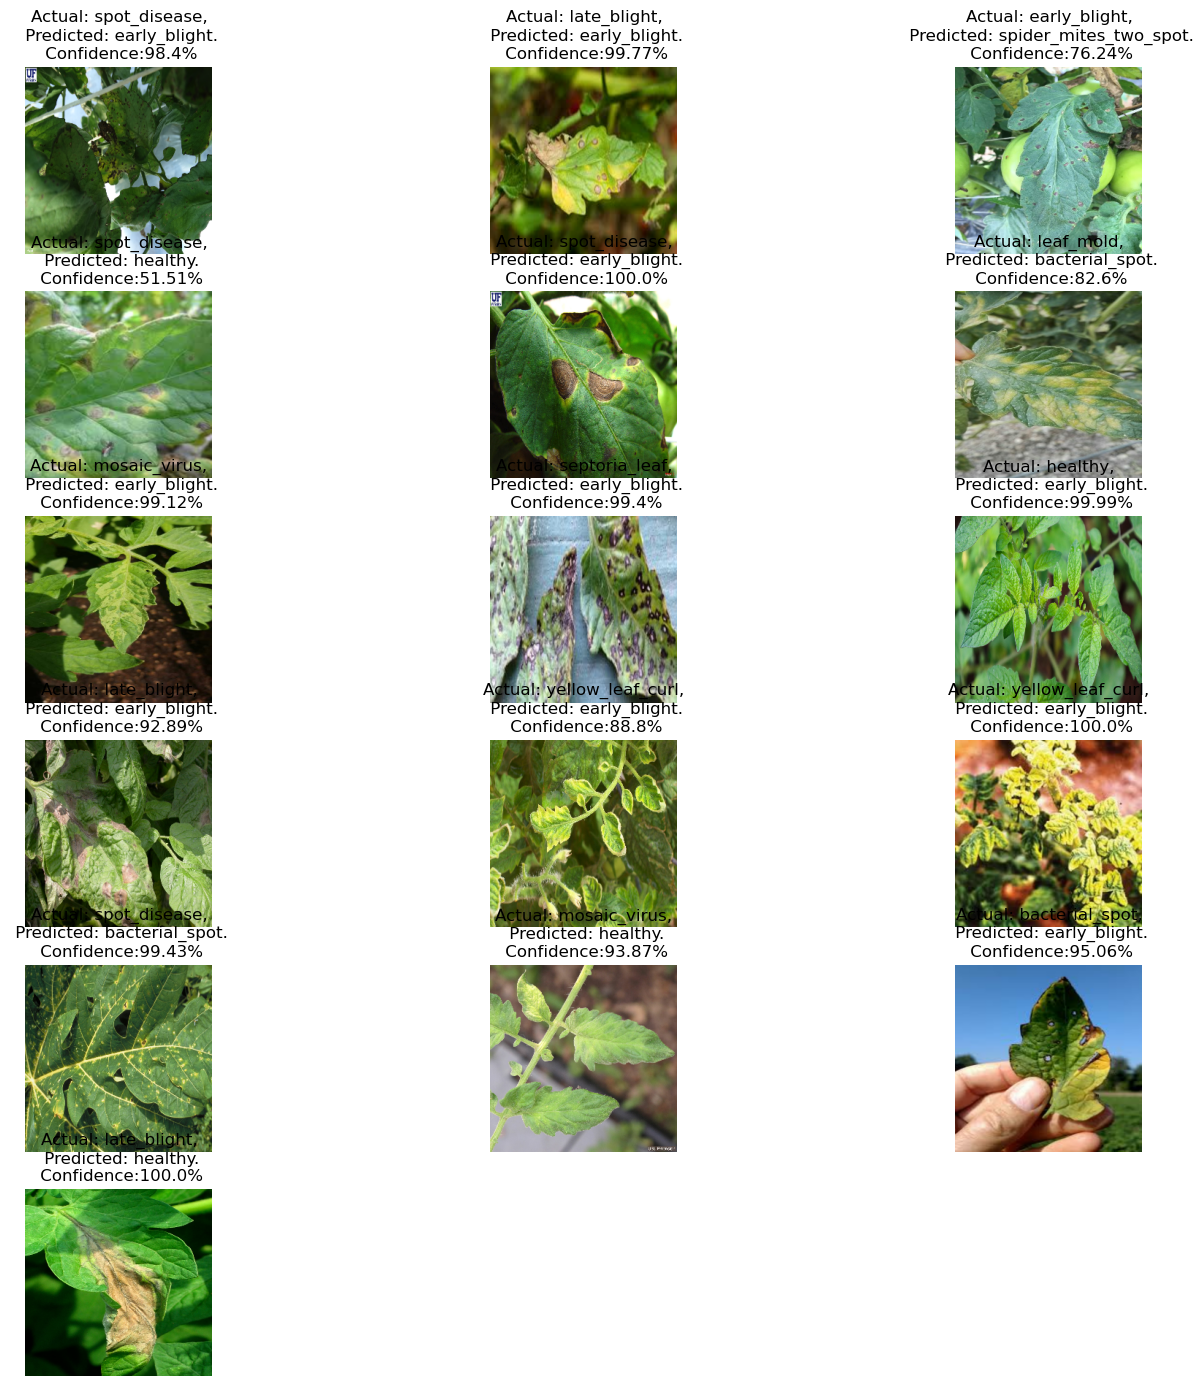

In [74]:
plt.figure(figsize = (17,17))
for images, labels in test_data_unprepared.take(1):
    for i in range(16):
        ax = plt.subplot(6, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict2(model, images[i].numpy())
        actual_class = class_names2[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence:{confidence}%")
        
        plt.axis("off")